# Walmart sales forecasting prediction

 data from Walmart to forecast their weekly sales

In [170]:
import os 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
import re, datetime, time
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
os.getcwd()

'/Users/vishnupriyakodavatiganti'

In [4]:
os.chdir('/Users/vishnupriyakodavatiganti/Desktop/Walmart')

In [362]:
train=pd.read_csv('train.csv')
len_train=len(train)
test=pd.read_csv('test.csv')
len_test=len(test)

In [299]:
#train.head()
print(len_test,len_train)

139119 282451


In [300]:
train.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,282451.000000,282451.000000,282451.000000,282451.000000,282451.000000,100520.000000,74232.000000,91521.000000,90031.000000,101029.000000,282451.000000,282451.000000,282451.000000
mean,22.193166,44.286138,15983.429692,60.113640,3.360300,7246.077559,3318.408122,1417.397841,3379.591745,4639.476021,171.207802,7.968098,136730.073220
std,12.782138,30.503641,22661.092494,18.446485,0.458602,8254.606267,9485.575898,9547.858949,6269.428446,6060.459590,39.160808,1.868070,61002.319363
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.330000,46.780000,2.932000,2241.190000,40.960000,5.060000,508.100000,1877.810000,132.022667,6.891000,93638.000000
50%,22.000000,38.000000,7616.550000,62.150000,3.452000,5363.520000,191.820000,24.340000,1482.030000,3364.410000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20245.745000,74.290000,3.737000,9235.590000,1919.790000,103.130000,3607.570000,5563.800000,212.464799,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [301]:
#train.groupby('Dept').count()

In [302]:
data=pd.concat([train,test],axis=0)

In [303]:
data.tail()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Type,Unemployment,Weekly_Sales
139114,129.826833,2011-11-18,91,3.669,False,86.59,6.00,NaN,NaN,3220.86,39690,33,63.35,A,8.010,NaN
139115,130.645793,2012-03-02,85,3.242,False,25204.67,2436.75,167.88,16066.76,7289.69,219622,13,32.36,A,6.104,NaN
139116,211.855267,2011-01-28,91,3.010,False,NaN,NaN,NaN,NaN,NaN,42988,30,44.04,C,8.028,NaN
139117,197.655186,2012-06-08,32,3.741,False,8483.84,361.80,77.99,1640.00,6841.59,203007,32,71.14,A,8.090,NaN
139118,141.843393,2012-04-13,33,4.187,False,5139.48,4770.63,53.84,1532.47,4176.90,204184,27,52.22,A,8.253,NaN


In [304]:
data.describe()

,CPI,Dept,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Unemployment,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,282451.000000
mean,171.201947,44.260317,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,136727.915739,22.200546,60.090059,7.960289,15983.429692
std,39.159276,30.492054,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,60980.583328,12.785297,18.447931,1.863296,22661.092494
min,126.064000,1.000000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,34875.000000,1.000000,-2.060000,3.879000,-4988.940000
25%,132.022667,18.000000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,93638.000000,11.000000,46.680000,6.891000,2079.330000
50%,182.318780,37.000000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,140167.000000,22.000000,62.090000,7.866000,7616.550000
75%,212.416993,74.000000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,202505.000000,33.000000,74.280000,8.572000,20245.745000
max,227.232807,99.000000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,219622.000000,45.000000,100.140000,14.313000,693099.360000


In [305]:
data.isnull().sum()

CPI                  0
Date                 0
Dept                 0
Fuel_Price           0
IsHoliday            0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
Size                 0
Store                0
Temperature          0
Type                 0
Unemployment         0
Weekly_Sales    139119
dtype: int64

In [306]:
data.fillna(0,inplace=True)

In [307]:
data.isnull().sum()

CPI             0
Date            0
Dept            0
Fuel_Price      0
IsHoliday       0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
Size            0
Store           0
Temperature     0
Type            0
Unemployment    0
Weekly_Sales    0
dtype: int64

In [308]:
df=data

In [309]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Type,Unemployment,Weekly_Sales
0,136.213613,2011-08-26,92,3.796,False,0.00,0.0,0.0,0.00,0.00,152513,26,61.10,A,7.767,87235.57
1,128.616064,2011-03-25,22,3.480,False,0.00,0.0,0.0,0.00,0.00,158114,34,53.11,A,10.398,5945.97
2,211.265543,2010-12-03,28,2.708,False,0.00,0.0,0.0,0.00,0.00,140167,21,50.43,B,8.163,1219.89
3,214.878556,2010-09-17,9,2.582,False,0.00,0.0,0.0,0.00,0.00,155078,8,75.32,A,6.315,11972.71
4,138.106581,2012-05-18,55,4.029,False,12613.98,0.0,11.5,1705.28,3600.79,203819,19,58.81,A,8.150,8271.82


In [310]:
df.shape

(421570, 16)

In [311]:
def add_datepart(df, fldname, parts=[], drop=True):
    """add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace.
    """
    # Acknowledgment: Fast.ai ML library https://github.com/fastai/fastai/blob/master/fastai/structured.py
    # Jeremy Howard c.s.
    #kaggle source rik de dekan

    if len(parts) == 0:
        parts = [
            'Year', 
            'Month', 
            'Week', 
            'Dayofyear',
            'Dayofweek', 
            'Day', 
            'Is_month_end', 
            'Is_month_start', 
            'Is_quarter_end', 
            'Is_quarter_start', 
            'Is_year_end', 
            'Is_year_start',
            'Elapsed',
                ]

    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)

    # remove the word "date" from the end of the fldname
    targ_pre = re.sub('[Dd]ate$', '', fldname) 
    for n in parts:
        target = targ_pre+n
        if not target in df.columns:
            df[target] = getattr(fld.dt,n.lower())
            if n == 'Elapsed':
                df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9

    if drop: df.drop(fldname, axis=1, inplace=True)

In [312]:
add_datepart(df, 'Date', parts=['Year', 'Month', 'Week'], drop=False)

In [313]:
df['Type'] = 'Type_' + df['Type'].astype(str)

In [314]:
# create dummy features/columns for categorical data

'''catcats = [
     "Year",
     "Month",
     "Type",
     "Store",
     "Dept
     ]
for c in catcats:
    if c in df.columns:
        dummies = pd.get_dummies(df[c], prefix=c, prefix_sep='')
        df = pd.concat([df, dummies], axis=1)"'''

dummies=pd.get_dummies(df['Type'])
df = pd.concat([df, dummies], axis=1)

In [315]:
list=['Date','Type'
      #,'Markdown1','Markdown2','Markdown3','Markdown4','Markdown5'
     ]

for d in list:
    if d in df.columns:
        df.drop(d,axis=1,inplace=True)


In [316]:
df.head()

,CPI,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Unemployment,Weekly_Sales,Year,Month,Week,Type_A,Type_B,Type_C
0,136.213613,92,3.796,False,0.00,0.0,0.0,0.00,0.00,152513,26,61.10,7.767,87235.57,2011,8,34,1,0,0
1,128.616064,22,3.480,False,0.00,0.0,0.0,0.00,0.00,158114,34,53.11,10.398,5945.97,2011,3,12,1,0,0
2,211.265543,28,2.708,False,0.00,0.0,0.0,0.00,0.00,140167,21,50.43,8.163,1219.89,2010,12,48,0,1,0
3,214.878556,9,2.582,False,0.00,0.0,0.0,0.00,0.00,155078,8,75.32,6.315,11972.71,2010,9,37,1,0,0
4,138.106581,55,4.029,False,12613.98,0.0,11.5,1705.28,3600.79,203819,19,58.81,8.150,8271.82,2012,5,20,1,0,0


In [317]:
from sklearn.cross_validation import train_test_split

In [318]:
x=df.drop('Weekly_Sales',axis=1)
y=df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [320]:
df['diff']=df.groupby(['Store','Dept'])['Weekly_Sales'].shift(1)

In [325]:
np.unique(df['diff'])

array([-4988.94, -1750.  , -1699.  , ...,      nan,      nan,      nan])

In [326]:
df['diff1']=df.groupby(['Store','Dept'])['Weekly_Sales'].shift(0)

In [327]:
np.unique(df['diff1'])

array([  -4988.94,   -1750.  ,   -1699.  , ...,  630999.19,  649770.18,
        693099.36])

In [329]:
df['difference']=df['diff']-df['diff1']

In [330]:
df1=df['difference']

In [331]:
df1=df1.fillna(0).values

In [334]:
df1

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [335]:
Y_diff = np.diff(y_train)

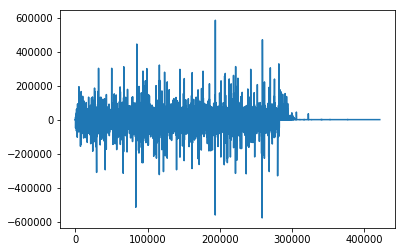

In [337]:
plt.plot(df1)

In [338]:
model=ARIMA(df1,order=(1,1,0))

In [339]:
x=model.fit(disp=0)

In [340]:
x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:               421569
Model:                 ARIMA(1, 1, 0)   Log Likelihood            -4487587.176
Method:                       css-mle   S.D. of innovations          10158.092
Date:                Fri, 01 Jun 2018   AIC                        8975180.352
Time:                        21:51:10   BIC                        8975213.207
Sample:                             1   HQIC                       8975189.719
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.086e-14     10.427   3.92e-15      1.000     -20.437      20.437
ar.L1.D.y     -0.5004      0.001   -375.272      0.000      -0.503      -0.498
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9984           +0.0000j            1.9984            0.5000
-----------------------------------------------------------------------------
"""

In [341]:
y_pred=x.predict()

In [347]:
Ymae  = metrics.mean_absolute_error(df1[-139119:], y_pred[-139119:])

In [348]:
Ymae

539.61986211272449

In [351]:
print('Test MSE: %.3f' % Ymae)

Test MSE: 539.620


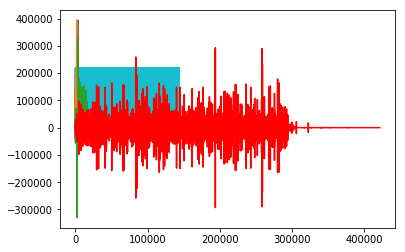

In [354]:
# plot
from matplotlib import pyplot
pyplot.plot(test)
pyplot.plot(y_pred, color='red')
pyplot.show()

In [364]:
submission = pd.DataFrame({'id':test['Store'].map(str) + '_' + test['Dept'].map(str) + '_' + test['Date'].map(str),
                          'Weekly_Sales':y_pred[-139119:].flatten()})

array([ -7.99214602e+02,  -1.90170120e+04,   1.90554133e+04, ...,
         6.13009284e-14,   6.13009284e-14,   6.13009284e-14])

In [365]:
submission.to_csv('submission.csv',index=False)